## 1. Swedish demographic data (*)
#Go to Swedish-language wikipedia page Sveriges demografi.

In [124]:
import pandas as pd
import plotly_express as px 
import matplotlib.pyplot as plt
import plotly.graph_objs as go

In [151]:
link="https://sv.wikipedia.org/wiki/Sveriges_demografi"
import pandas as pd
tables=pd.read_html(link)
tables

[                              0                            1
 0            Sveriges demografi           Sveriges demografi
 1   Sveriges befolkningspyramid  Sveriges befolkningspyramid
 2                    Befolkning            10 427 296 (88:e)
 3             Befolkningstäthet                23,3 inv./km²
 4                    Födelsetal   12,1/1 000 invånare (2018)
 5                       Dödstal    9,4/1 000 invånare (2017)
 6        Förväntad levnadslängd                          NaN
 7                         • män                   80,6 år[1]
 8                     • kvinnor                      84,3 år
 9          Summerad fruktsamhet      1,66 barn/kvinna (2020)
 10           Spädbarnsdödlighet            2,6/1 000 födslar
 11                      0–14 år                  17,62 % [1]
 12                  65 och över                      19,78 %,
                                    Vid utgången av år  \
                                    Vid utgången av år   
 0             

 # a)
  Read in the table under "Befolkningsstatistik sedan 1900" into a DataFrame

In [152]:
df = tables[5] # 0 is first table in the html page ,5 is sex table in this page
df1=df.rename(columns={"Unnamed: 0": "Year"})
df1

,Year,Folkmängd,Födda,Döda,Befolkningsförändringar,Nativiteten (per 1000),Dödstalen (per 1000),Befolkningsförändringar (per 1000),Total fertilitet
0,1900,5 117 000,138 139,86 146,51 993,270,168,102,402
1,1901,5 156 000,139 370,82 772,56 598,270,161,110,404
2,1902,5 187 000,137 364,79 722,57 642,265,154,111,395
3,1903,5 210 000,133 896,78 610,55 286,257,151,106,382
4,1904,5 241 000,134 952,80 152,54 800,257,153,105,383
...,...,...,...,...,...,...,...,...,...
116,2016,9 995 000,117 425,90 982,26 443,118,92,26,185
117,2017,10 120 000,115 416,91 972,23 444,114,91,23,179
118,2018,10 230 000,115 832,92 185,23 647,113,90,23,175
119,2019,10 327 589,114 523,88 766,28 727,111,87,24,170


# b) 
Choose to do some EDA (exploratory data analysis) on this dataset. And draw some relevant graphs.

# Bar Chart

In [153]:

import matplotlib.pyplot as plt
import plotly_express as px 

fig=px.bar(df1,x="Year",y="Folkmängd",title="Sweden population 1900-2020",range_x=[1900,2020])
fig.show()


Text(0.5, 1.0, 'Befolkningsförändringar vs year')

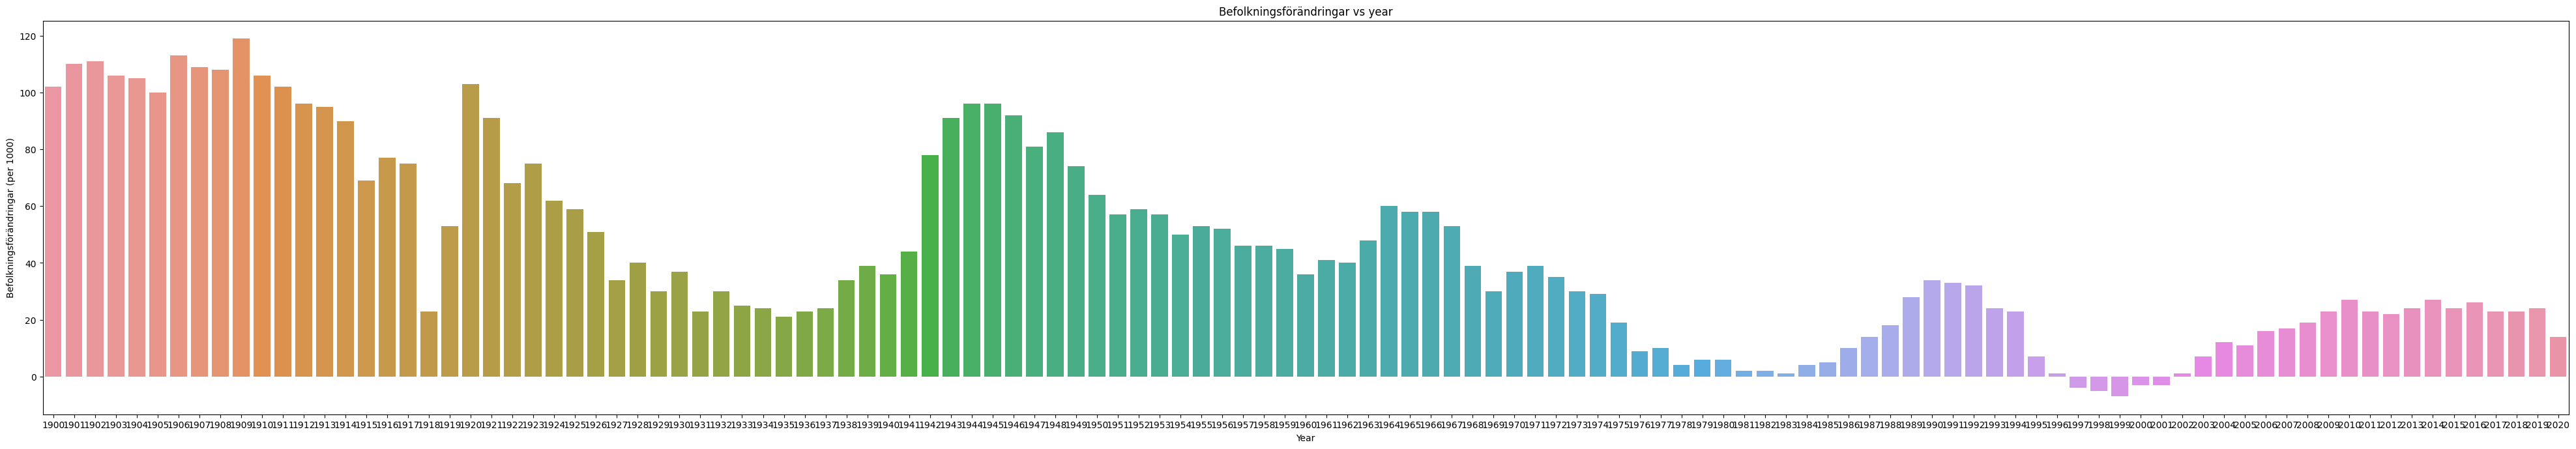

In [155]:
import seaborn as sns
fig = plt.figure(dpi=100, figsize=(50,8))
sns.barplot(data=df1, y="Befolkningsförändringar (per 1000)", x="Year").set_title("Befolkningsförändringar vs year")

# Line Chart

In [116]:

fig=px.line(df1,x="Year",y="Folkmängd",title="Sweden population 1900-2020",range_x=[1900,2020],log_y=True)
fig.show()

In [120]:
df1

,Year,Folkmängd,Födda,Döda,Befolkningsförändringar,Nativiteten (per 1000),Dödstalen (per 1000),Befolkningsförändringar (per 1000),Total fertilitet
0,1900,5 117 000,138 139,86 146,51 993,270,168,102,402
1,1901,5 156 000,139 370,82 772,56 598,270,161,110,404
2,1902,5 187 000,137 364,79 722,57 642,265,154,111,395
3,1903,5 210 000,133 896,78 610,55 286,257,151,106,382
4,1904,5 241 000,134 952,80 152,54 800,257,153,105,383
...,...,...,...,...,...,...,...,...,...
116,2016,9 995 000,117 425,90 982,26 443,118,92,26,185
117,2017,10 120 000,115 416,91 972,23 444,114,91,23,179
118,2018,10 230 000,115 832,92 185,23 647,113,90,23,175
119,2019,10 327 589,114 523,88 766,28 727,111,87,24,170


# https://www.jb51.net/article/198125.htm?tdsourcetag=s_pcqq_aiomsg

In [122]:

# 1.绘制图形轨迹，在ployly里面叫做`trace`，每一个轨迹是一个trace。
trace0=go.Scatter(x=df1["Year"],y=df["Folkmängd"])
trace1=go.Scatter(x=df1["Year"],y=df["Nativiteten"])
trace2=go.Scatter(x=df1["Year"],y=df["Dödstalen "])

# 2.将轨迹包裹成一个列表，形成一个“轨迹列表”。一个轨迹放在一个列表中，多个轨迹也是放在一个列表中。
data=[trace0,trace1,trace2]

# 3.创建画布的同时，并将上述的`轨迹列表`，传入到`Figure()`中。
fig = go.Figure(data)

# 4.使用`Layout()`添加其他的绘图参数，完善图形。
fig.update_layout(
  title="population,birthrate,deathrate",
  xaxis_title="Year",
  yaxis_title="change"
  )
# 5.展示图形。
fig.show()



# range_x=[1900,2020],log_y=True

ValueError: 
    Invalid value of type 'builtins.str' received for the 'x' property of scatter
        Received value: 'Year'

    The 'x' property is an array that may be specified as a tuple,
    list, numpy array, or pandas Series

#   c)
 Now we want to go backwards in time (before 1900) to see how population has changed in Sweden. Read in the table under history and keep the data of "Folkmängd" from 1570-1865.

In [170]:
df_1900 = tables[1] # 0 is first table in the html page ,5 is sex table in this page
df_1900=df_1900.rename(columns={"Vid utgången av år":"År"})
df_1900

År  \
                                                   År   
0                                                1570   
1                                                1650   
2                                                1700   
3                                                1720   
4                                                1755   
5                                                1815   
6                                                1865   
7                                                1900   
8                                                2000   
9                                                2020   
10  Datan avser folkmängden inom Sveriges nuvarand...   

                                            Folkmängd  \
                                            Folkmängd   
0                                             900 000   
1                                           1 225 000   
2                                           1 485 000   
3                                           1 350 000   
4                                           1 878 000   
5                                           2 465 000   
6                                           4 099 000   
7                                           5 140 000   
8                                           8 861 000   
9                                          10 379 000   
10  Datan avser folkmängden inom Sveriges nuvarand...   

                                       Årlig tillväxt  \
                                               Totalt   
0                                                   —   
1                                               4 063   
2                                               5 200   
3                                              −6 750   
4                                              15 086   
5                                               9 783   
6                                              32 680   
7                                              29 743   
8                                                 NaN   
9                                                 NaN   
10  Datan avser folkmängden inom Sveriges nuvarand...   

                                                       
                                             Promille  
0                                                   —  
1                                                 386  
2                                                 386  
3                                               −4,75  
4                                                 948  
5                                                 454  
6                                                1022  
7                                                 648  
8                                                 NaN  
9                                                 NaN  
10  Datan avser folkmängden inom Sveriges nuvarand...

In [164]:
df_before1900 = df_before1900.iloc[:,0:2]#删除了后两列
df_before1900 = df_before1900.loc[lambda df_before1900: df_before1900["Vid utgången av år"] <= "1865"]
df_before1900 

ValueError: Cannot index with multidimensional key

In [139]:
df3=df_before1900.drop(index=[7,8,9,10]).rename(
                                         columns={
                                             "Vid utgången av år":"Year",
                                             "Totalt":"Befolkningsförändringar",
                                             "Promille": "Befolkningsförändringar (per 1000) "})

df3

Year  Folkmängd          Årlig tillväxt                                    
   Year  Folkmängd Befolkningsförändringar Befolkningsförändringar (per 1000) 
0  1570    900 000                       —                                   —
1  1650  1 225 000                   4 063                                 386
2  1700  1 485 000                   5 200                                 386
3  1720  1 350 000                  −6 750                               −4,75
4  1755  1 878 000                  15 086                                 948
5  1815  2 465 000                   9 783                                 454
6  1865  4 099 000                  32 680                                1022

 # d) 
 Now concatenate this with the table from 1900 so that you have population data from 1570 to 2020. Note that you may need to clean the data in order for it to fit properly. Also you may be able to do this in several ways.

In [140]:
df2=df1.drop(["Födda",	"Döda", "Nativiteten (per 1000)",	"Dödstalen (per 1000)","Total fertilitet" ], axis=1)  # axis 默认为0，指删除行，因此删除columns时要指定axis=1；
df2

,Year,Folkmängd,Befolkningsförändringar,Befolkningsförändringar (per 1000)
0,1900,5 117 000,51 993,102
1,1901,5 156 000,56 598,110
2,1902,5 187 000,57 642,111
3,1903,5 210 000,55 286,106
4,1904,5 241 000,54 800,105
...,...,...,...,...
116,2016,9 995 000,26 443,26
117,2017,10 120 000,23 444,23
118,2018,10 230 000,23 647,23
119,2019,10 327 589,28 727,24


In [148]:
df3.drop(Labels=None,axis=10)

TypeError: drop() got an unexpected keyword argument 'Labels'

In [142]:
df2.append(df3, ignore_index=True)

,"(Folkmängd, Folkmängd)","(Year, Year)","(Årlig tillväxt, Befolkningsförändringar)","(Årlig tillväxt, Befolkningsförändringar (per 1000) )",Befolkningsförändringar,Befolkningsförändringar (per 1000),Folkmängd,Year
0,NaN,NaN,NaN,NaN,51 993,102.0,5 117 000,1900.0
1,NaN,NaN,NaN,NaN,56 598,110.0,5 156 000,1901.0
2,NaN,NaN,NaN,NaN,57 642,111.0,5 187 000,1902.0
3,NaN,NaN,NaN,NaN,55 286,106.0,5 210 000,1903.0
4,NaN,NaN,NaN,NaN,54 800,105.0,5 241 000,1904.0
...,...,...,...,...,...,...,...,...
123,1 485 000,1700,5 200,386,NaN,NaN,NaN,NaN
124,1 350 000,1720,−6 750,"−4,75",NaN,NaN,NaN,NaN
125,1 878 000,1755,15 086,948,NaN,NaN,NaN,NaN
126,2 465 000,1815,9 783,454,NaN,NaN,NaN,NaN


# e) 
Draw a graph of population data from 1570-2020.


# 2. Denmark demographic data (*)
Go to the Danish-language wikipedia page Danmarks demografi.

  # a) 
  Read in the table under "Demografiske data" into a DataFrame (*)

 

In [ ]:
link="https://da.wikipedia.org/wiki/Danmarks_demografi"
import pandas as pd
tables=pd.read_html(link)
tables

In [ ]:
df_danmark = tables[0] # 0 is first table in the html page ,5 is sex table in this page
df_danmark.drop(index=[0,1]).reset_index(drop=True) #drop=true 去掉旧的INDEX,drop=false 保留旧的INDEX 且产生新的INDEX



 # b) 
  Clean the data and draw a graph of population against year from 1769-2020. (**)

# 3. Norwegian demographic data (*)
Go to Swedish-language wikipedia page Norges demografi.

  a) Read in the table under "Befolkningsstatistik sedan 1900" into a DataFrame

  b) You see some missing data in column "Total fertilitet". Go to the English page and read in the data from "Vital statistics since 1900".

  c) Pick out the fertility column from b) dataset, merge it into a) dataset and clean the data so that you only have columns "År", "Folkmängd", "Fertilitet".

# 4. Merge Sweden-Norway (*)
Create a population graph and a fertility graph showing Sweden and Norway.